In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import metrics

%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [6]:
df = pd.read_csv('../US_births.csv', low_memory=False)

In [7]:
df.shape

(3801534, 55)

In [4]:
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)

In [5]:
df.drop(df[df['BMI'].eq(99.9)].index, inplace=True)
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)
df.drop(df[df['WTGAIN'].eq(99)].index, inplace=True)
df.drop(df[df['PWgt_R'].eq(999)].index, inplace=True)
df['binary_sex'] = np.where(df['SEX'] == 'M', 1, 0)

In [6]:
df.shape

(3674100, 56)

In [7]:
conditions = [df['CIG_0'].eq(0),
              df['CIG_0'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['smoked'] = np.select(conditions, choices, 'Daily')

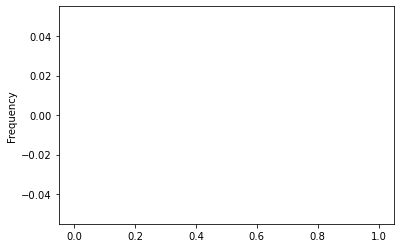

In [8]:
df[df['WTGAIN'].eq(99)]['BMI'].plot(kind='hist')

In [9]:
df.shape

(3674100, 57)

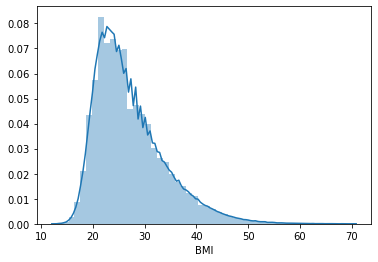

In [10]:
sns.distplot(df['BMI'])

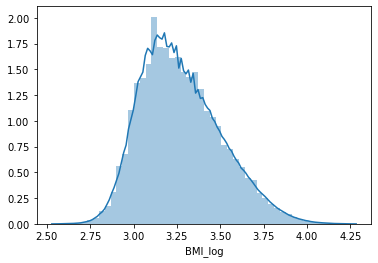

In [11]:
df['BMI_log'] = np.log(df['BMI'])
sns.distplot(df['BMI_log'])

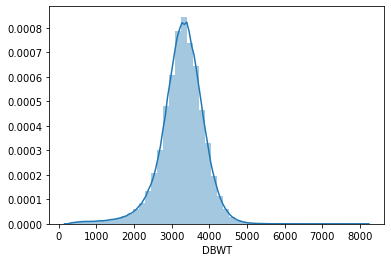

In [12]:
sns.distplot(df['DBWT'])

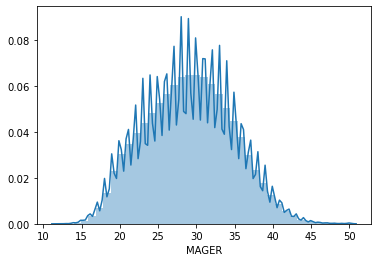

In [13]:
sns.distplot(df['MAGER'], bins = 39)

In [14]:
df.shape

(3674100, 58)

In [15]:
df['NO_INFEC'].value_counts()

1    3567006
0     100527
9       6567
Name: NO_INFEC, dtype: int64

In [16]:
df['MRAVE6'].value_counts()

1    2711512
2     572614
4     246105
6      97356
3      34964
5      11549
Name: MRAVE6, dtype: int64

In [17]:
df['PRIORTERM'].value_counts()

0     2664854
1      653951
2      220352
3       76112
4       27844
5       11255
99       8457
6        5159
7        2470
8        1365
9         805
10        682
11        276
12        229
13        111
14         62
15         36
16         24
17         21
18         12
19          8
21          3
20          3
24          2
27          2
28          1
23          1
25          1
26          1
22          1
Name: PRIORTERM, dtype: int64

In [18]:
df['FRACE6'].value_counts()


1    2253785
9     650108
2     454587
4     206636
6      76135
3      23710
5       9139
Name: FRACE6, dtype: int64

In [19]:
df['SEX'].value_counts()

M    1877875
F    1796225
Name: SEX, dtype: int64

In [20]:
df['PAY'].value_counts()

2    1821527
1    1537063
3     155922
8      67699
5      44580
6      27119
9      17464
4       2726
Name: PAY, dtype: int64

In [21]:
df['DMAR'].unique()

array(['1', '2', ' '], dtype=object)

In [22]:
df['LD_INDL'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [23]:
df['RF_CESAR'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [24]:
df['NO_RISKS'].unique()

array([1, 0, 9], dtype=int64)

In [25]:
df['NO_MMORB'].unique()

array([1, 0, 9], dtype=int64)

In [26]:
df['MAGE_IMPFLG'].unique()

array([' ', '1'], dtype=object)

In [51]:
df['BMI*SEX'] = np.where(df['SEX'].eq('M'), df['BMI'], 0)

In [49]:
df['SEX'].unique()

array(['M', 'F'], dtype=object)

In [66]:
df['BMI*AGE'] = df['BMI'] * df['MAGER']

In [68]:
X = df[['BMI','MAGER','smoked', 'PRIORDEAD', 'WTGAIN','binary_sex','MRAVE6', 'PRIORTERM','FRACE6', 'BMI*AGE',
       'SEX', 'PAY','MEDUC','FEDUC','DMAR','ATTEND','BFACIL', 'PAY_REC', 'MTRAN', 'BMI*SEX',
       'LD_INDL','RF_CESAR','RDMETH_REC', 'NO_INFEC','NO_RISKS','NO_MMORB']]
_X = pd.get_dummies(X, columns=['MRAVE6','smoked','FRACE6',
                               'SEX', 'PAY','MEDUC','FEDUC','DMAR','ATTEND','BFACIL', 'PAY_REC', 'MTRAN',
                               'LD_INDL','RF_CESAR','RDMETH_REC','NO_INFEC','NO_RISKS','NO_MMORB'])
y = df['DBWT']

In [69]:
_X.shape

(3674100, 99)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(_X, y, random_state = 42, test_size= 0.2)


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns = _X.columns)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(data=X_test, columns = _X.columns)

In [72]:
# _X.corr()

In [73]:
lasso_cv = LassoCV(cv=5, random_state=42, verbose=1, tol=0.001)
lasso_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.001, verbose=1)

In [74]:
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

In [75]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

545.4457594795863

In [76]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

545.6337483936362

In [77]:
y.describe()

count    3.674100e+06
mean     3.265474e+03
std      5.862192e+02
min      2.270000e+02
25%      2.966000e+03
50%      3.305000e+03
75%      3.629000e+03
max      8.165000e+03
Name: DBWT, dtype: float64

In [78]:
_coef_df = pd.DataFrame()
_coef_df['variables'] = _X.columns
_coef_df['coefficients'] = lasso_cv.coef_
_coef_df

,variables,coefficients
0,BMI,1.203367e+02
1,MAGER,2.431477e+01
2,PRIORDEAD,1.174063e+00
3,WTGAIN,1.163824e+02
4,binary_sex,5.547773e+01
5,PRIORTERM,-2.116906e+00
6,BMI*AGE,-2.887821e+01
7,BMI*SEX,-5.551703e+00
8,MRAVE6_1,1.678220e+01
9,MRAVE6_2,-4.390055e+01


In [79]:
X

,BMI,MAGER,smoked,PRIORDEAD,WTGAIN,binary_sex,MRAVE6,PRIORTERM,FRACE6,BMI*AGE,SEX,PAY,MEDUC,FEDUC,DMAR,ATTEND,BFACIL,PAY_REC,MTRAN,BMI*SEX,LD_INDL,RF_CESAR,RDMETH_REC,NO_INFEC,NO_RISKS,NO_MMORB
0,30.7,30,None,0,41,1,1,2,1,921.0,M,2,6,3,1,1,1,2,N,30.7,N,N,1,1,1,1
1,33.3,35,Daily,0,0,0,3,0,3,1165.5,F,1,9,4,2,1,1,1,N,0.0,N,Y,4,1,0,1
2,30.0,28,None,0,58,1,1,0,1,840.0,M,5,6,4,1,1,1,4,N,30.0,N,N,1,1,0,1
3,23.7,23,None,0,0,0,3,0,3,545.1,F,1,2,2,2,3,1,1,N,0.0,N,N,1,1,1,1
4,35.5,37,None,0,0,1,1,4,2,1313.5,M,1,4,3,1,1,1,1,N,35.5,N,N,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801528,29.4,33,None,0,32,0,2,0,2,970.2,F,2,5,3,2,1,1,2,N,0.0,N,Y,4,1,0,1
3801529,26.3,32,None,0,47,1,2,0,1,841.6,M,1,3,3,2,1,1,1,N,26.3,N,Y,4,1,0,1
3801530,32.4,23,None,0,10,1,1,1,1,745.2,M,1,2,2,2,1,1,1,N,32.4,N,N,1,1,1,1
3801531,27.6,35,None,0,22,0,4,1,4,966.0,F,1,3,3,2,5,7,1,N,0.0,N,N,1,1,1,1


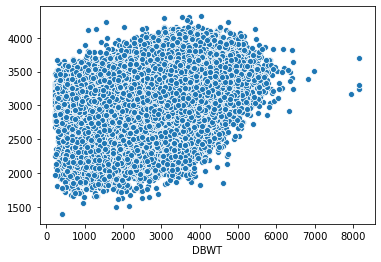

In [80]:
sns.scatterplot(y_test,y_test_pred)

In [81]:
df.shape

(3674100, 60)

In [ ]:
df['FAGECOMB'].value_counts()

In [ ]:
df['MRAVE6'].value_counts()

In [ ]:
X

In [ ]:
df['NO_INFEC'].value_counts()

In [ ]:
df.shape

In [ ]:
df['CIG_0'].value_counts()